In [124]:
import numpy as np 
import pandas as pd 
from pandas.plotting import scatter_matrix
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
from sklearn.exceptions import ConvergenceWarning
import warnings

In [56]:
df = pd.read_csv("data/heart.csv")

In [57]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [59]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [60]:
# since Sex has categories values, check types of values
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [61]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [62]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [63]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [64]:
## check is data has null values
df.isnull().values.any()

False

In [65]:
encoder = LabelEncoder()
encoder.fit_transform(df['Sex'])

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [66]:
# using Label Encoder, transform all the categerical columns to have numerical values
categorical_columns = ['Sex', 'ST_Slope', 'ChestPainType', 'RestingECG', 'ExerciseAngina']
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])

In [67]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [68]:
df.shape

(918, 12)

In [69]:
n_samples, n_features = df.shape

In [70]:
n_samples

918

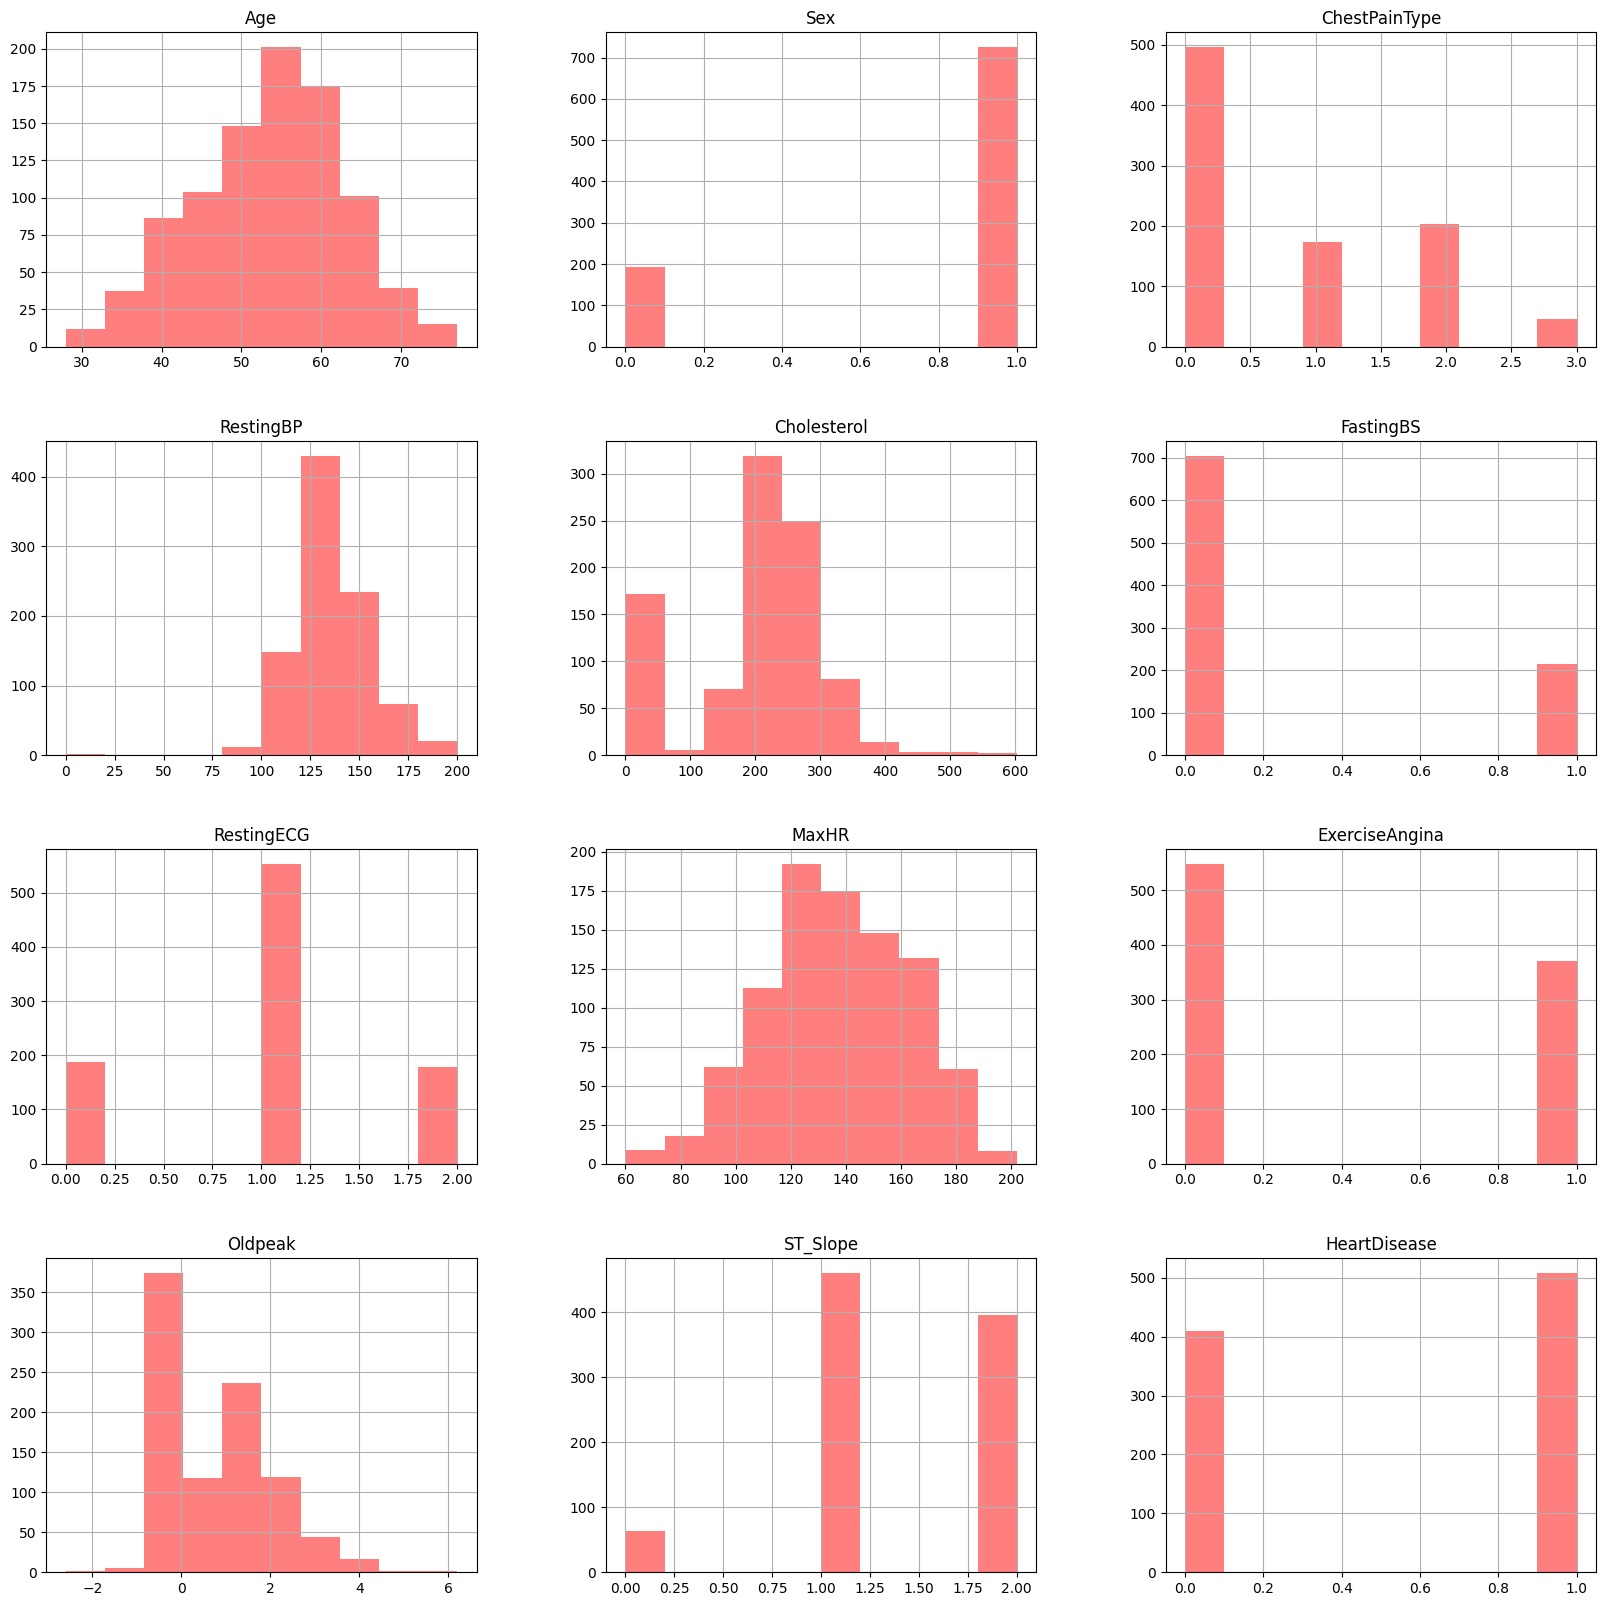

In [71]:
df.hist(alpha=0.5, figsize=(20, 20), color='red')
plt.show()

In [72]:
# split data for training

In [73]:
features = []
for column in df.columns:
    if column != 'HeartDisease':
        features.append(column)

X = df.loc[:, features]
y = df.loc[:, 'HeartDisease']

In [86]:
X_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.75)

In [87]:
X_train.shape

(688, 11)

In [88]:
x_test.shape

(230, 11)

In [89]:
x_test.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
878,49,1,1,130,266,0,1,171,0,0.6,2
907,44,1,0,120,169,0,1,144,1,2.8,0
652,59,1,3,160,273,0,0,125,0,0.0,2
38,48,0,1,120,177,1,2,148,0,0.0,2
542,54,0,0,138,274,0,1,105,1,1.5,1


In [90]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)

In [93]:
X_train_scaled

array([[-1.25448101,  0.52802501,  0.22193395, ..., -0.82343717,
        -0.81082374, -0.60261354],
       [ 0.82498637,  0.52802501, -0.83110438, ...,  1.21442173,
        -0.81082374,  1.02966251],
       [-1.56640112, -1.89384969, -0.83110438, ..., -0.82343717,
        -0.81082374, -0.60261354],
       ...,
       [-0.21474732,  0.52802501, -0.83110438, ...,  1.21442173,
         0.71308743,  1.02966251],
       [ 0.40909289, -1.89384969, -0.83110438, ...,  1.21442173,
        -0.04886815, -0.60261354],
       [ 1.13690647,  0.52802501, -0.83110438, ...,  1.21442173,
         0.14162074, -0.60261354]])

In [105]:
# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Multilayer Perceptron (Neural Network)
nn_model = MLPClassifier(
    hidden_layer_sizes=(10,),  # Number of neurons in the hidden layers
    activation='relu',          # Activation function for hidden layers
    solver='adam',              # Optimization algorithm
    max_iter=700,                # Maximum number of iterations
    alpha=0.01,                # L2 regularization term
    learning_rate='constant',    # Learning rate schedule
    random_state=123              # Seed for reproducibility
)

# Fit the model
nn_model.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(10,), max_iter=700,
              random_state=123)

In [126]:
# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Fit the model and make predictions
nn_model.fit(X_train_scaled, y_train)

nn_train_predictions = nn_model.predict(X_train_scaled)
nn_train_accuracy = accuracy_score(y_train, nn_train_predictions)

nn_test_predictions = nn_model.predict(x_test_scaled)
nn_test_accuracy = accuracy_score(y_test, nn_test_predictions)

In [125]:
# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
nn_cv_accuracy = cross_val_score(nn_model, X_train_scaled, y_train, cv=5).mean()

In [120]:
# Initialize PrettyTable; for better visualization
result_table = PrettyTable()
result_table.field_names = ["Model", "Training Accuracy", "Testing Accuracy", "Cross-Validation Accuracy"]

# Multilayer Perceptron result in the table
result_table.add_row(["Multilayer Perceptron", f"{nn_train_accuracy:.4f}", f"{nn_test_accuracy:.4f}", f"{nn_cv_accuracy:.4f}"])

# Print the table
print(result_table)

+-----------------------+-------------------+------------------+---------------------------+
|         Model         | Training Accuracy | Testing Accuracy | Cross-Validation Accuracy |
+-----------------------+-------------------+------------------+---------------------------+
| Multilayer Perceptron |       0.9099      |      0.8739      |           0.8474          |
+-----------------------+-------------------+------------------+---------------------------+
